In [1]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install dash

In [3]:

pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import svm
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


C:\Users\chemez\AppData\Local\Temp\ipykernel_8848\2446682584.py:7: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

C:\Users\chemez\AppData\Local\Temp\ipykernel_8848\2446682584.py:8: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [70]:
import pandas as pd

# Read the CSV files
 = pd.read_csv('countries.csv',sep = ',')

mpi = pd.read_csv('mpi_FinalTOT.csv',sep = ',')
merged_df = pd.merge(Country, mpi, on='Country', how='inner')


In [71]:

 merged_df.shape



(90, 24)

In [72]:
# Compréhension des données

In [73]:
merged_df=merged_df.drop(['Region'], axis=1)
merged_df=merged_df.drop(['Carbon Footprint'], axis=1)

In [74]:
merged_df.columns

Index(['Country', 'Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Fish Footprint', 'Total Ecological Footprint', 'Cropland',
       'Grazing Land', 'Forest Land', 'Fishing Water', 'Urban Land',
       'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required', 'Data Quality', 'MPI Urban',
       'MPI Rural', 'MPI'],
      dtype='object')

In [75]:
merged_df=merged_df.drop(['Data Quality'], axis=1)
merged_df=merged_df.drop(['HDI'], axis=1)
merged_df=merged_df.drop(['Population (millions)', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required','Cropland Footprint','Grazing Footprint','Forest Footprint'], axis=1)
merged_df.drop('GDP per Capita', axis=1, inplace=True)

In [76]:
merged_df.tail()

,Country,MPI Urban,MPI Rural,MPI
85,Uzbekistan,0.004,0.010,0.0070
86,Viet Nam,0.013,0.036,0.0245
87,Yemen,0.080,0.304,0.1920
88,Zambia,0.130,0.380,0.2550
89,Zimbabwe,0.034,0.202,0.1180


In [77]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    90 non-null     object 
 1   MPI Urban  90 non-null     float64
 2   MPI Rural  90 non-null     float64
 3   MPI        90 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.5+ KB


In [78]:
merged_df.dtypes 

Country       object
MPI Urban    float64
MPI Rural    float64
MPI          float64
dtype: object

In [79]:
merged_df

,Country,MPI Urban,MPI Rural,MPI
0,Afghanistan,0.132,0.347,0.2395
1,Albania,0.003,0.007,0.0050
2,Algeria,0.003,0.011,0.0070
3,Armenia,0.001,0.001,0.0010
4,Azerbaijan,0.009,0.035,0.0220
...,...,...,...,...
85,Uzbekistan,0.004,0.010,0.0070
86,Viet Nam,0.013,0.036,0.0245
87,Yemen,0.080,0.304,0.1920
88,Zambia,0.130,0.380,0.2550


In [80]:
merged_df.fillna(merged_df.mean(), inplace=True)

In [22]:
merged_df.describe()

,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
count,188.000000,172.00000,173.000000,173.000000,173.000000,173.000000,173.000000,188.000000,173.000000,173.000000,173.000000,173.000000,173.000000,188.000000,188.000000,188.000000,188.000000
mean,37.342372,0.68636,0.578208,0.263179,0.373815,1.804913,0.122486,3.317606,0.531850,0.456590,2.459191,0.595145,0.067110,4.019681,0.702074,1.915745,4.037397
std,140.756836,0.15604,0.355691,0.352067,0.359349,1.898283,0.158427,2.370931,0.672567,1.014738,10.593956,1.661872,0.054844,11.689075,11.771339,1.369624,12.444616
min,0.000000,0.34000,0.070000,0.000000,0.010000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,-14.140000,0.240000,0.020000
25%,2.037500,0.55750,0.350000,0.080000,0.170000,0.420000,0.020000,1.482500,0.180000,0.030000,0.060000,0.030000,0.030000,0.675000,-1.935000,0.855000,0.942500
50%,7.970000,0.72000,0.520000,0.180000,0.260000,1.140000,0.070000,2.740000,0.350000,0.120000,0.340000,0.110000,0.050000,1.310000,-0.730000,1.580000,1.705000
75%,24.870000,0.80250,0.700000,0.320000,0.460000,2.600000,0.150000,4.640000,0.590000,0.340000,1.170000,0.370000,0.090000,2.815000,0.212500,2.677500,2.847500
max,1408.040000,0.94000,2.680000,3.470000,3.030000,12.650000,0.820000,15.820000,5.420000,8.230000,95.160000,16.070000,0.270000,111.350000,109.010000,9.140000,159.470000


In [82]:
merged_df.isna().sum()

Country      0
MPI Urban    0
MPI Rural    0
MPI          0
dtype: int64

In [81]:
merged_df

,Country,MPI Urban,MPI Rural,MPI
0,Afghanistan,0.132,0.347,0.2395
1,Albania,0.003,0.007,0.0050
2,Algeria,0.003,0.011,0.0070
3,Armenia,0.001,0.001,0.0010
4,Azerbaijan,0.009,0.035,0.0220
...,...,...,...,...
85,Uzbekistan,0.004,0.010,0.0070
86,Viet Nam,0.013,0.036,0.0245
87,Yemen,0.080,0.304,0.1920
88,Zambia,0.130,0.380,0.2550


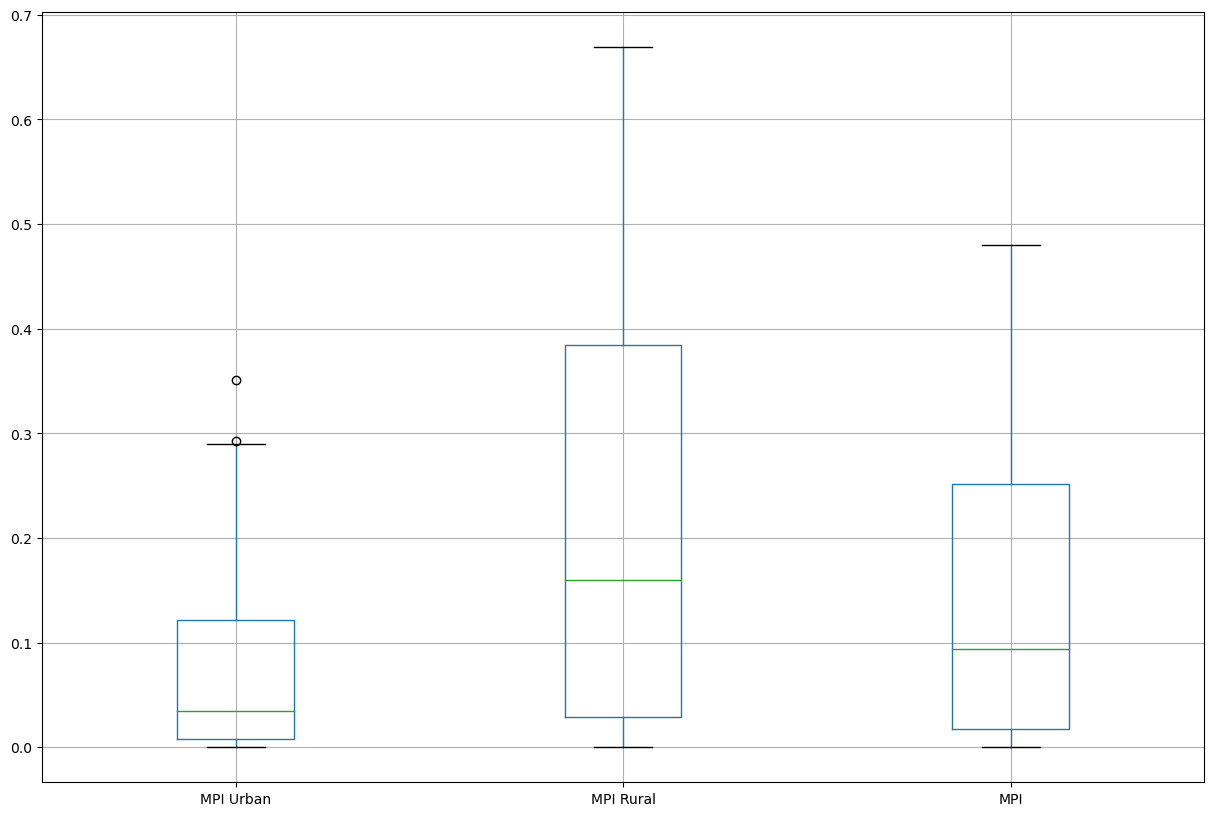

In [85]:
merged_df.iloc[:,1:].boxplot(figsize=(15,10));

In [86]:
merged_df.describe(include=['object'])

,Country
count,90
unique,90
top,Afghanistan
freq,1


In [87]:
import seaborn as sb
import numpy as np

features = [
   'Carbon Footprint','MPI Urban','MPI Rural','MPI']

def impute(merged_df, feature):
    q1 = np.percentile(merged_df[feature] , 25)
    q3 = np.percentile(merged_df[feature] , 75)
    iqr = q3 - q1 
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    merged_df.loc[merged_df[feature] < lower, feature] = lower
    merged_df.loc[merged_df[feature] > upper, feature] = upper

for feature in features:
    impute(merged_df, feature)

KeyError: 'Carbon Footprint'

In [24]:
from sklearn.ensemble import IsolationForest
import pandas as pd
merged_df.fillna(merged_df.median(), inplace=True)

# Définir l'ensemble de données à utiliser pour la détection des anomalies
X = merged_df['Population (millions)'].values.reshape(-1, 1)

# Diviser les données en ensembles d'entraînement et de test
train_size = int(0.7 * len(X))
X_train = X[:train_size]
X_test = X[train_size:]

# Créer une instance de la classe IsolationForest
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=42)

# Entraîner l'algorithme en utilisant l'ensemble d'entraînement
clf.fit(X_train)

# Utiliser l'algorithme pour prédire les anomalies dans l'ensemble de test
y_pred = clf.predict(X_test)

# Remplacer les valeurs aberrantes par la médiane
merged_df.loc[train_size:, 'Population (millions)'][y_pred == -1] = merged_df['Population (millions)'].median()

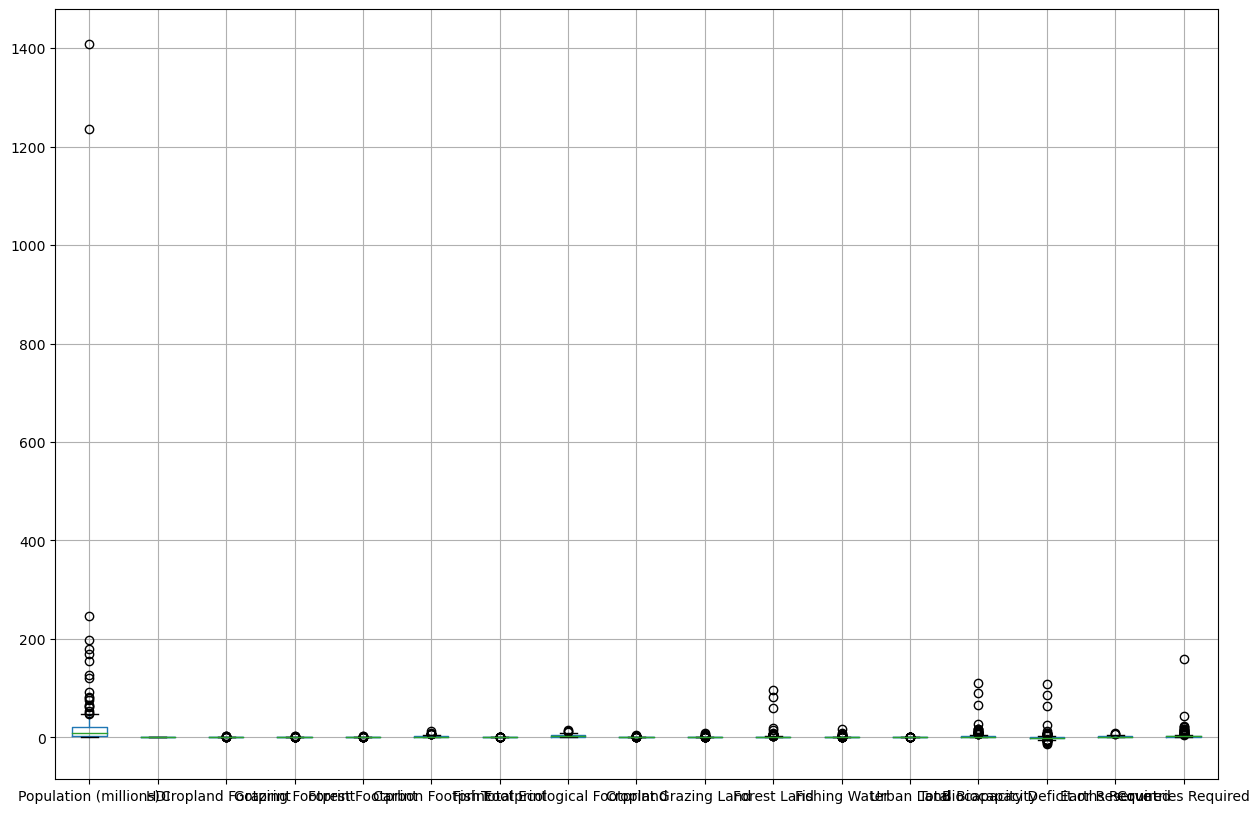

In [25]:
merged_df.iloc[:,1:].boxplot(figsize=(15,10));

In [26]:
merged_df.iloc[:,1:].corr()

,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
Population (millions),1.000000,-0.029679,-0.038950,-0.073041,-0.080983,-0.043373,-0.061663,-0.082426,-0.001457,-0.053983,-0.038167,-0.060412,0.064754,-0.048637,-0.031709,-0.082388,-0.024219
HDI,-0.029679,1.000000,0.521546,0.082138,0.210070,0.662315,0.187952,0.697073,0.300628,-0.012642,0.018947,0.091770,0.339198,0.063979,-0.076874,0.697081,0.190734
Cropland Footprint,-0.038950,0.521546,1.000000,0.080744,0.439621,0.412450,0.084085,0.540695,0.765565,0.078664,-0.048736,0.080467,0.433824,0.017326,-0.091728,0.540608,0.018814
Grazing Footprint,-0.073041,0.082138,0.080744,1.000000,0.062597,0.131328,-0.048855,0.245812,0.108145,0.698061,0.021080,0.079150,0.092543,0.090846,0.040673,0.245784,-0.033755
Forest Footprint,-0.080983,0.210070,0.439621,0.062597,1.000000,0.201978,-0.033286,0.357861,0.420068,0.094365,0.147241,0.118086,0.461407,0.173427,0.100113,0.358138,0.070467
Carbon Footprint,-0.043373,0.662315,0.412450,0.131328,0.201978,1.000000,0.163422,0.868666,0.125127,-0.032129,0.015934,0.120682,0.231010,0.031079,-0.144098,0.868742,0.286507
Fish Footprint,-0.061663,0.187952,0.084085,-0.048855,-0.033286,0.163422,1.000000,0.165077,-0.053736,-0.056612,0.018450,0.173203,-0.030169,0.027565,-0.005810,0.164851,0.056182
Total Ecological Footprint,-0.082426,0.697073,0.540695,0.245812,0.357861,0.868666,0.165077,1.000000,0.269654,0.072603,0.015430,0.121690,0.317963,0.066580,-0.135312,0.999997,0.282719
Cropland,-0.001457,0.300628,0.765565,0.108145,0.420068,0.125127,-0.053736,0.269654,1.000000,0.304887,0.006517,0.098440,0.448990,0.098423,0.043381,0.269637,-0.132901
Grazing Land,-0.053983,-0.012642,0.078664,0.698061,0.094365,-0.032129,-0.056612,0.072603,0.304887,1.000000,0.099465,0.119329,0.058682,0.199296,0.183277,0.072176,-0.107962


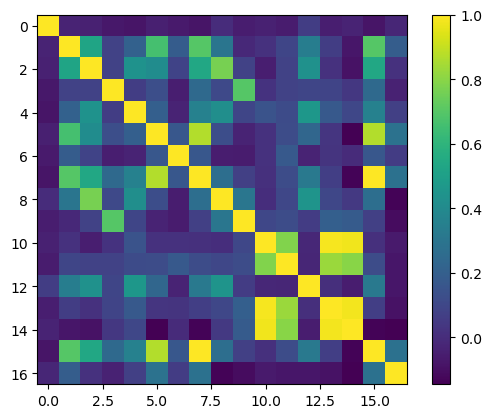

In [27]:
plt.imshow(merged_df.iloc[:,1:].corr());
plt.colorbar();

In [28]:
merged_df.isna().sum()


Country                            0
Region                             0
Population (millions)              0
HDI                                0
GDP per Capita                    15
Cropland Footprint                 0
Grazing Footprint                  0
Forest Footprint                   0
Carbon Footprint                   0
Fish Footprint                     0
Total Ecological Footprint         0
Cropland                           0
Grazing Land                       0
Forest Land                        0
Fishing Water                      0
Urban Land                         0
Total Biocapacity                  0
Biocapacity Deficit or Reserve     0
Earths Required                    0
Countries Required                 0
Data Quality                       0
dtype: int64

# Feature Engineering

In [29]:
##val NA whith mean
merged_df.fillna(merged_df.mean(), inplace=True)


In [30]:
merged_df.isna().sum()

Country                            0
Region                             0
Population (millions)              0
HDI                                0
GDP per Capita                    15
Cropland Footprint                 0
Grazing Footprint                  0
Forest Footprint                   0
Carbon Footprint                   0
Fish Footprint                     0
Total Ecological Footprint         0
Cropland                           0
Grazing Land                       0
Forest Land                        0
Fishing Water                      0
Urban Land                         0
Total Biocapacity                  0
Biocapacity Deficit or Reserve     0
Earths Required                    0
Countries Required                 0
Data Quality                       0
dtype: int64

In [31]:
merged_df.isna().sum()

Country                            0
Region                             0
Population (millions)              0
HDI                                0
GDP per Capita                    15
Cropland Footprint                 0
Grazing Footprint                  0
Forest Footprint                   0
Carbon Footprint                   0
Fish Footprint                     0
Total Ecological Footprint         0
Cropland                           0
Grazing Land                       0
Forest Land                        0
Fishing Water                      0
Urban Land                         0
Total Biocapacity                  0
Biocapacity Deficit or Reserve     0
Earths Required                    0
Countries Required                 0
Data Quality                       0
dtype: int64

In [32]:
import seaborn as sb
import numpy as np

features =['Population (millions)', 
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required',  
       'MPI Urban', 'Headcount Ratio Urban', 'Intensity of Deprivation Urban',
       'MPI Rural', 'Headcount Ratio Rural', 'Intensity of Deprivation Rural'] 

def impute(merged_df, feature):
    q1 = np.percentile(merged_df[feature] , 25)
    q3 = np.percentile(merged_df[feature] , 75)
    iqr = q3 - q1 
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    merged_df.loc[merged_df[feature] < lower, feature] = lower
    merged_df.loc[merged_df[feature] > upper, feature] = upper

for feature in features:
    impute(merged_df, feature)

KeyError: 'MPI Urban'

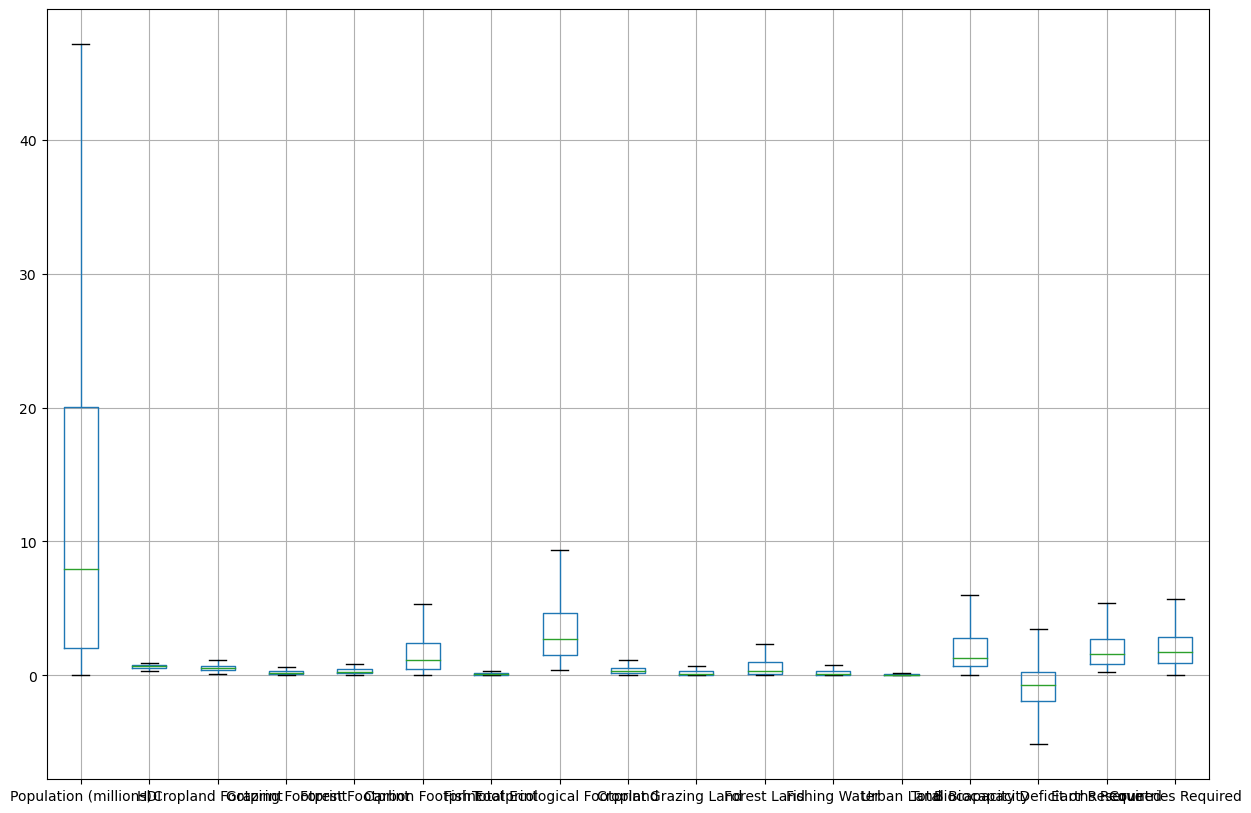

In [33]:
merged_df.iloc[:,1:].boxplot(figsize=(15,10));

In [34]:
merged_df.tail()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
183,Viet Nam,Asia-Pacific,7.97,0.66,"$1,532.31",0.50,0.01,0.19,0.79,0.05,...,0.55,0.010,0.17,0.16,0.10,1.00,-0.65,0.95,1.66,6
184,Wallis and Futuna Islands,Asia-Pacific,0.01,0.72,NaN,0.52,0.18,0.26,1.14,0.07,...,0.35,0.120,0.34,0.11,0.05,1.51,-0.56,1.19,1.37,3T
185,Yemen,Middle East/Central Asia,23.85,0.50,"$1,302.30",0.34,0.14,0.04,0.42,0.04,...,0.09,0.120,0.04,0.20,0.04,0.50,-0.53,0.59,2.06,5
186,Zambia,Africa,14.08,0.58,"$1,740.64",0.19,0.18,0.33,0.24,0.01,...,0.24,0.715,0.99,0.02,0.04,2.23,1.24,0.57,0.44,6
187,Zimbabwe,Africa,13.72,0.49,$865.91,0.20,0.32,0.29,0.53,0.01,...,0.15,0.320,0.12,0.01,0.02,0.62,-0.75,0.79,2.20,6


In [35]:
merged_df.to_csv('Country_Final.csv', index=False)

### Gestion  Encoding + Rescaling 

In [36]:
##encodage
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
merged_df['Country'] = encoder.fit_transform(merged_df['Country'])
merged_df['Region'] = encoder.fit_transform(merged_df['Region'])
merged_df['Data Quality'] = encoder.fit_transform(merged_df['Data Quality'])


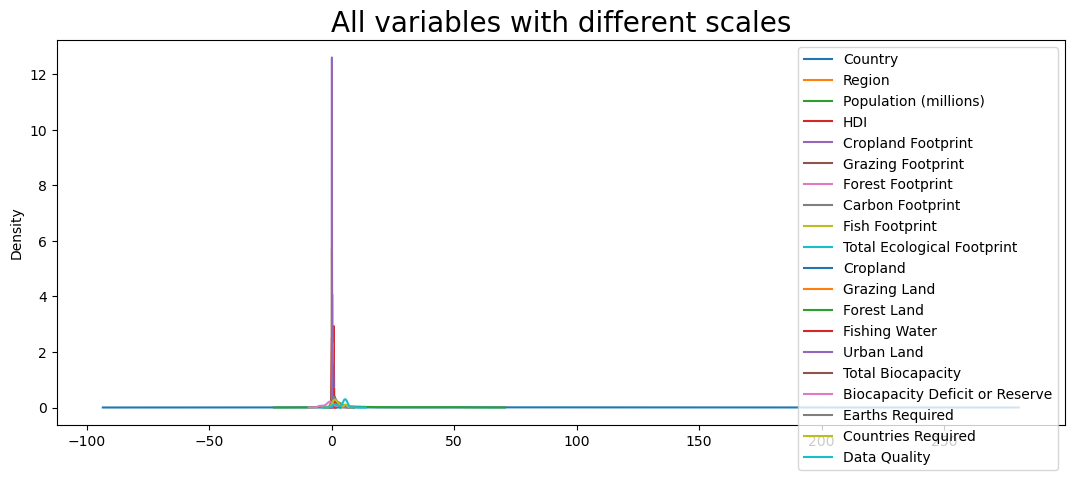

In [37]:
merged_df.plot(kind='density',figsize=(13,5))
plt.title('All variables with different scales', fontsize=20)
plt.show()

In [38]:
merged_df.columns

Index(['Country', 'Region', 'Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required', 'Data Quality'],
      dtype='object')

In [39]:
ss = StandardScaler()
numerical_cols = ['Country','Population (millions)', 'HDI',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required'] # replace with actual numerical column names
merged_df_cp = merged_df[numerical_cols]
ssr = ss.fit_transform(merged_df_cp)
merged_df_rescaled = pd.DataFrame(ssr, columns=numerical_cols)




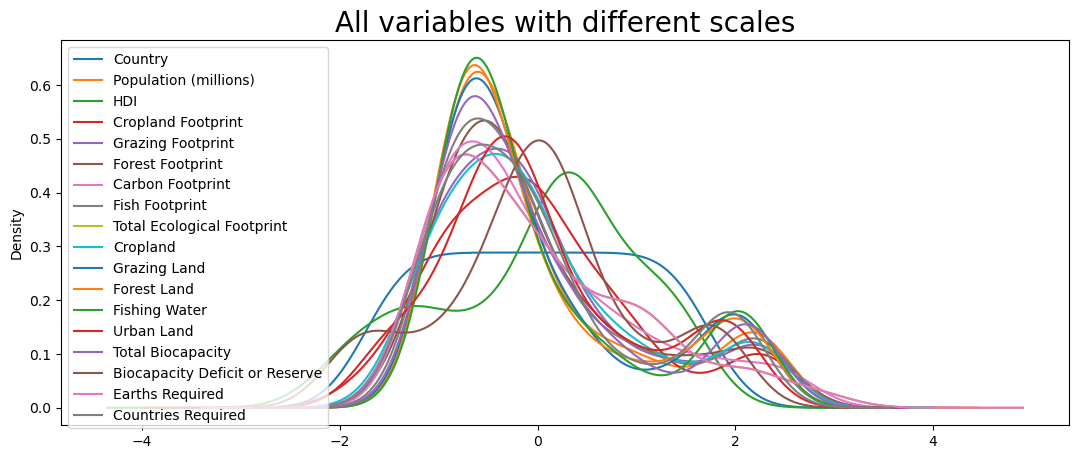

In [40]:
merged_df_rescaled.plot(kind='density',figsize=(13,5))
plt.title('All variables with different scales', fontsize=20)
plt.show()

In [42]:
merged_df_rescaled.tail()

,Country,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
183,1.649157,-0.359209,-0.195976,-0.196658,-1.200528,-0.631668,-0.581988,-0.522884,-0.747356,0.411738,-0.872518,-0.650778,-0.256836,0.976507,-0.589515,0.069888,-0.749379,-0.329124
184,1.667583,-0.883783,0.206403,-0.118245,-0.225709,-0.327172,-0.346890,-0.310454,-0.552689,-0.236458,-0.417502,-0.433985,-0.447235,-0.272359,-0.313512,0.108199,-0.556777,-0.494118
185,1.686009,0.687303,-1.268985,-0.823962,-0.455078,-1.284161,-0.830521,-0.629099,-1.034722,-1.079113,-0.417502,-0.816561,-0.104517,-0.522132,-0.860106,0.120969,-1.038282,-0.101547
186,1.704436,0.043448,-0.732480,-1.412059,-0.225709,-0.022675,-0.951428,-0.947745,-1.053262,-0.592966,2.043722,0.394930,-0.789953,-0.522132,0.076140,0.874416,-1.054332,-1.023235
187,1.722862,0.019723,-1.336048,-1.372852,0.577083,-0.196673,-0.756633,-0.947745,-0.877134,-0.884654,0.409801,-0.714541,-0.828033,-1.021679,-0.795164,0.027321,-0.877781,-0.021895


In [43]:
##merged_df_rescaled.to_csv('merged_model.csv', index=False)

In [44]:
###merged_df_rescaled.to_csv('country_model.csv', index=False)


In [45]:
merged_df_rescaled.dtypes

Country                           float64
Population (millions)             float64
HDI                               float64
Cropland Footprint                float64
Grazing Footprint                 float64
Forest Footprint                  float64
Carbon Footprint                  float64
Fish Footprint                    float64
Total Ecological Footprint        float64
Cropland                          float64
Grazing Land                      float64
Forest Land                       float64
Fishing Water                     float64
Urban Land                        float64
Total Biocapacity                 float64
Biocapacity Deficit or Reserve    float64
Earths Required                   float64
Countries Required                float64
dtype: object

In [46]:
X =merged_df_rescaled.drop('Country', axis=1)

In [47]:
y = merged_df_rescaled['Country']

In [48]:
y

0     -1.722862
1     -1.704436
2     -1.686009
3     -1.667583
4     -1.649157
         ...   
183    1.649157
184    1.667583
185    1.686009
186    1.704436
187    1.722862
Name: Country, Length: 188, dtype: float64

In [49]:
# Calcul des composantes principales
# Le nombre de composantes (K) n’étant pas spécifié, il est par défaut égal au nombre de variables (K = p)
pca = PCA(svd_solver='full')
coord = pca.fit_transform(X)
coord

array([[-3.39068002e+00, -3.28500815e-01, -6.76824807e-01, ...,
         1.12390936e-02,  5.50246863e-02,  2.07820533e-03],
       [-5.82043581e-01, -2.59036175e-01, -8.69518512e-01, ...,
         1.73255337e-01,  5.45590940e-02, -2.73722154e-03],
       [-1.46765309e+00, -1.38456539e+00, -1.00105742e+00, ...,
         1.98731210e-02, -2.42341928e-02, -2.19645344e-03],
       ...,
       [-3.02895895e+00, -7.21545541e-01,  9.37548078e-02, ...,
         6.98093120e-02,  3.00431203e-02, -2.27284120e-03],
       [-2.60533430e+00,  1.87429360e+00,  1.38441459e-01, ...,
         1.48911390e-01,  1.49031284e-01,  2.52544007e-04],
       [-2.79975524e+00, -2.69077239e-01,  3.74503808e-01, ...,
        -8.87523533e-02,  8.18554954e-02, -8.26337413e-04]])

In [50]:
pca.n_components_

17

In [51]:
pca.explained_variance_

array([5.20984548e+00, 4.16004686e+00, 1.92403526e+00, 1.33634078e+00,
       9.47921992e-01, 6.81584831e-01, 5.57862097e-01, 5.47594810e-01,
       4.47251451e-01, 3.26905101e-01, 2.58440490e-01, 2.19220516e-01,
       1.82005947e-01, 1.54090349e-01, 9.87068925e-02, 3.90528241e-02,
       3.40458348e-06])

In [52]:
pca.explained_variance_ratio_

array([3.04831385e-01, 2.43406997e-01, 1.12576531e-01, 7.81901522e-02,
       5.54635208e-02, 3.98799635e-02, 3.26408674e-02, 3.20401218e-02,
       2.61689679e-02, 1.91274261e-02, 1.51215180e-02, 1.28267323e-02,
       1.06492841e-02, 9.01592466e-03, 5.77540329e-03, 2.28500567e-03,
       1.99204353e-07])

In [53]:
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
eig = eigval = (n-1)/n*pca.explained_variance_
eigval

array([5.18213354e+00, 4.13791895e+00, 1.91380103e+00, 1.32923259e+00,
       9.42879854e-01, 6.77959380e-01, 5.54894745e-01, 5.44682071e-01,
       4.44872454e-01, 3.25166244e-01, 2.57065807e-01, 2.18054450e-01,
       1.81037830e-01, 1.53270719e-01, 9.81818559e-02, 3.88450963e-02,
       3.38647400e-06])

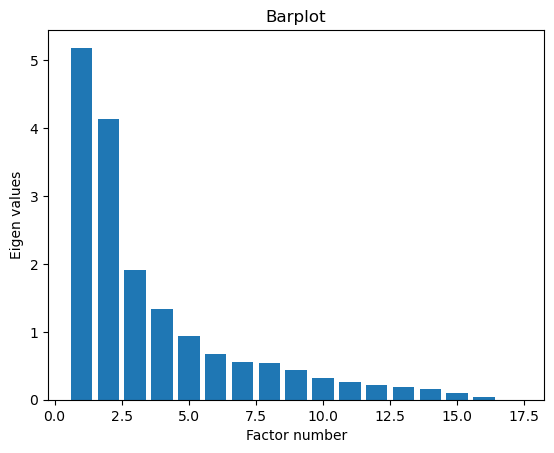

In [54]:
# barplot des valeurs propres
plt.bar(np.arange(1,p+1),eigval);
plt.title("Barplot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

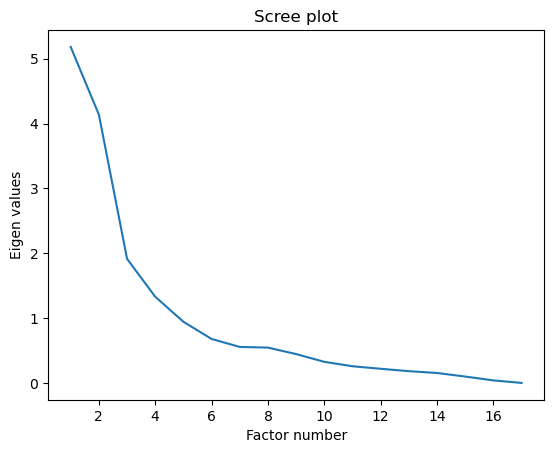

In [55]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

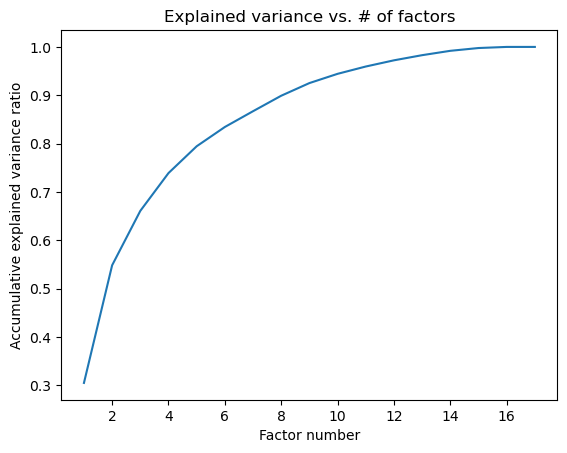

array([0.30483138, 0.54823838, 0.66081491, 0.73900507, 0.79446859,
       0.83434855, 0.86698942, 0.89902954, 0.92519851, 0.94432593,
       0.95944745, 0.97227418, 0.98292347, 0.99193939, 0.9977148 ,
       0.9999998 , 1.        ])

In [56]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Accumulative explained variance ratio")
plt.xlabel("Factor number")
plt.show()
np.cumsum(pca.explained_variance_ratio_)

In [57]:
#contribution des individus dans l'inertie totale
di = np.sum(X**2,axis=1)
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

pd.DataFrame({'Inertie':di,'COS2_D1':cos2[:,0],'COS2_D2':cos2[:,1],'COS2_D3':cos2[:,2],'COS2_D4':cos2[:,3],
              'Contrib_D1':ctr[:,0],'Contrib_D2':ctr[:,1],'Contrib_D3':ctr[:,2],'Contrib_D4':ctr[:,3]})

,Inertie,COS2_D1,COS2_D2,COS2_D3,COS2_D4,Contrib_D1,Contrib_D2,Contrib_D3,Contrib_D4
0,13.461557,0.854040,0.008016,0.034030,0.024156,0.011801,0.000139,0.001273,0.001301
1,4.023114,0.084207,0.016679,0.187930,0.049695,0.000348,0.000086,0.002101,0.000800
2,8.777424,0.245403,0.218404,0.114170,0.036406,0.002211,0.002464,0.002785,0.001279
3,13.850388,0.523369,0.243753,0.025066,0.008391,0.007441,0.004340,0.000965,0.000465
4,10.803040,0.050773,0.601028,0.013605,0.056679,0.000563,0.008346,0.000409,0.002450
...,...,...,...,...,...,...,...,...,...
183,6.613206,0.280940,0.031093,0.198636,0.117890,0.001907,0.000264,0.003651,0.003120
184,2.874732,0.352859,0.020386,0.002956,0.000150,0.001041,0.000075,0.000024,0.000002
185,10.905834,0.841255,0.047738,0.000806,0.000449,0.009417,0.000669,0.000024,0.000020
186,14.006636,0.484611,0.250808,0.001368,0.113223,0.006967,0.004516,0.000053,0.006346


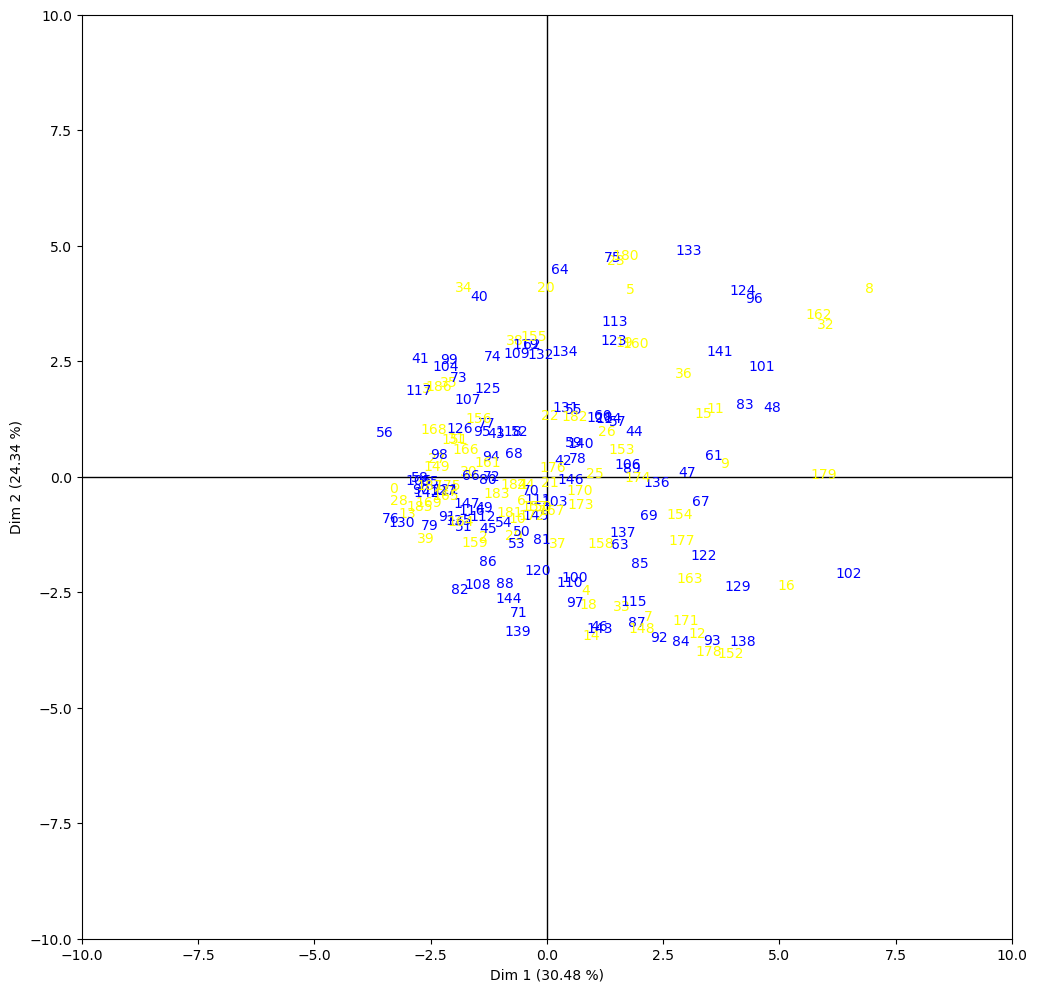

In [59]:
#positionnement des individus dans le plan
colors = ['blue','yellow']
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-10,10) #même limites en abscisse
axes.set_ylim(-10,10) #et en ordonnée
#conversion de y en entiers
y_int = y.astype(int)
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=colors[y_int[i]])
#ajouter les axes
plt.plot([-10,10],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='black',linestyle='-',linewidth=1)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (pca.explained_variance_ratio_[1]*100))
plt.show()


In [60]:
y

0     -1.722862
1     -1.704436
2     -1.686009
3     -1.667583
4     -1.649157
         ...   
183    1.649157
184    1.667583
185    1.686009
186    1.704436
187    1.722862
Name: Country, Length: 188, dtype: float64

In [61]:
y_int

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
183    1
184    1
185    1
186    1
187    1
Name: Country, Length: 188, dtype: int32

In [62]:
# Matrice de Corrélation
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
#cosinus carré des variables (qualité de représentation)
cos2var = corvar**2
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

    
pd.DataFrame({'id':X.columns,'COR_D1':corvar[:,0],'COR_D2':corvar[:,1], 'COR_D3':corvar[:,2],'COR_D4':corvar[:,3],
              'COS2_D1':cos2var[:,0],'COS2_D2':cos2var[:,1], 'COS2_D3':cos2var[:,2],'COS2_D4':cos2var[:,3],
              'Contrib_D1':ctrvar[:,0],'Contrib_D2':ctrvar[:,1],'Contrib_D3':ctrvar[:,2],'Contrib_D4':ctrvar[:,3]})

,id,COR_D1,COR_D2,COR_D3,COR_D4,COS2_D1,COS2_D2,COS2_D3,COS2_D4,Contrib_D1,Contrib_D2,Contrib_D3,Contrib_D4
0,Population (millions),-0.145215,0.001267,-0.587000,0.162542,0.004069,3.879371e-07,0.180044,0.019876,0.004069,3.879371e-07,0.180044,0.019876
1,HDI,0.811620,-0.226946,-0.059746,0.098689,0.127115,1.244694e-02,0.001865,0.007327,0.127115,1.244694e-02,0.001865,0.007327
2,Cropland Footprint,0.739618,-0.027009,-0.368750,0.092504,0.105562,1.762969e-04,0.071050,0.006437,0.105562,1.762969e-04,0.071050,0.006437
3,Grazing Footprint,0.383674,0.311131,0.205038,-0.627113,0.028406,2.339407e-02,0.021967,0.295863,0.028406,2.339407e-02,0.021967,0.295863
4,Forest Footprint,0.550044,0.375090,-0.192842,-0.061436,0.058383,3.400078e-02,0.019432,0.002839,0.058383,3.400078e-02,0.019432,0.002839
5,Carbon Footprint,0.836952,-0.349938,0.133797,-0.059567,0.135174,2.959385e-02,0.009354,0.002669,0.135174,2.959385e-02,0.009354,0.002669
6,Fish Footprint,0.325418,-0.094488,0.442486,0.602707,0.020435,2.157600e-03,0.102306,0.273282,0.020435,2.157600e-03,0.102306,0.273282
7,Total Ecological Footprint,0.921808,-0.212677,0.131023,-0.134170,0.163973,1.093096e-02,0.008970,0.013543,0.163973,1.093096e-02,0.008970,0.013543
8,Cropland,0.416359,0.374936,-0.660504,0.178765,0.033452,3.397283e-02,0.227957,0.024042,0.033452,3.397283e-02,0.227957,0.024042
9,Grazing Land,-0.038506,0.688982,0.102547,-0.519009,0.000286,1.147187e-01,0.005495,0.202651,0.000286,1.147187e-01,0.005495,0.202651


In [63]:
#corrélation de la cible avec les axes factoriels
corSupp = np.zeros((1,p))
for k in range(p):
    corSupp[0,k] = np.corrcoef(y,coord[:,k])[0,1]
corSupp

array([[-0.02922844, -0.07981608,  0.06158117,  0.14437397,  0.03113946,
         0.10229607, -0.00915636,  0.02632169, -0.06464538, -0.15893964,
        -0.0212802 , -0.07206546,  0.09045397, -0.0934746 , -0.03215086,
         0.06563651, -0.01763365]])

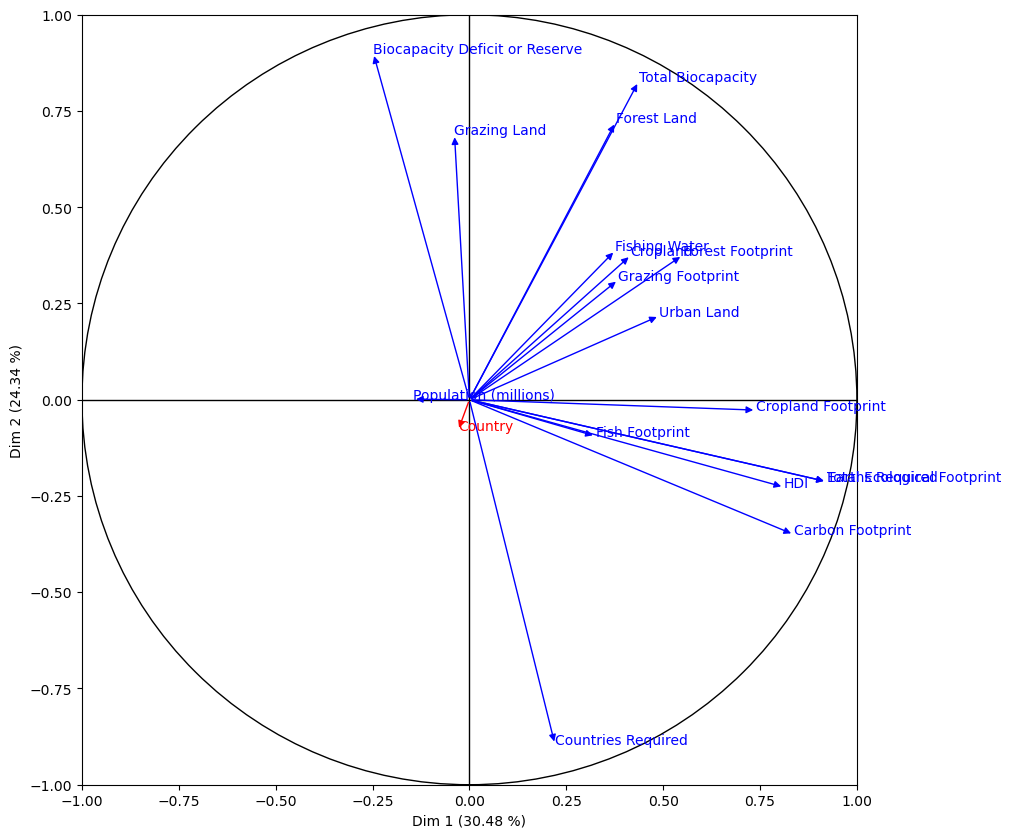

In [64]:
#cercle des corrélations du plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]),color='blue')
    plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corvar[j,0],corvar[j,1]), textcoords='data',
              arrowprops=dict(color='blue',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#affiche des variables illustratives (y)
plt.annotate('Country',(corSupp[0,0],corSupp[0,1]),color='red')
plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corSupp[0,0],corSupp[0,1]), textcoords='data',
              arrowprops=dict(color='red',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (pca.explained_variance_ratio_[1]*100))
plt.show()

In [65]:
X

,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
0,1.080733,-1.537237,-0.980787,-0.111024,-1.110163,-0.991731,-1.053960,-1.145961,-0.592966,-0.086581,-0.842066,-0.866113,-0.522132,-0.860106,0.218875,-1.142608,-0.363261
1,-0.676194,0.273466,0.901123,0.003660,-0.370671,-0.528252,-0.841530,-0.487800,0.411738,-0.045216,-0.497747,-0.599554,-0.022586,-0.492102,-0.091868,-0.492577,-0.209646
2,1.651438,0.273466,0.195407,-0.340394,-0.718667,-0.346890,-0.947745,-0.529514,-0.592966,0.202975,-0.829313,-0.828033,-0.771906,-0.811399,-0.304706,-0.532702,0.780314
3,0.487622,-1.134859,-0.863168,-0.397736,-0.936165,-0.978297,-0.098023,-1.081072,-0.722605,2.043722,-0.051409,0.123962,-0.522132,0.249318,1.031916,-1.078408,-1.063061
4,-0.878511,0.608781,-0.118245,-0.225709,-0.327172,-0.346890,-0.310454,0.981476,-0.236458,-0.417502,-0.433985,-0.447235,-0.272359,-0.621985,-1.543423,0.984038,1.969405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,-0.359209,-0.195976,-0.196658,-1.200528,-0.631668,-0.581988,-0.522884,-0.747356,0.411738,-0.872518,-0.650778,-0.256836,0.976507,-0.589515,0.069888,-0.749379,-0.329124
184,-0.883783,0.206403,-0.118245,-0.225709,-0.327172,-0.346890,-0.310454,-0.552689,-0.236458,-0.417502,-0.433985,-0.447235,-0.272359,-0.313512,0.108199,-0.556777,-0.494118
185,0.687303,-1.268985,-0.823962,-0.455078,-1.284161,-0.830521,-0.629099,-1.034722,-1.079113,-0.417502,-0.816561,-0.104517,-0.522132,-0.860106,0.120969,-1.038282,-0.101547
186,0.043448,-0.732480,-1.412059,-0.225709,-0.022675,-0.951428,-0.947745,-1.053262,-0.592966,2.043722,0.394930,-0.789953,-0.522132,0.076140,0.874416,-1.054332,-1.023235
